In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("data\survey_results_public.csv")
df.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0


In [55]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [56]:
df = df[["Country", "EdLevel", "YearsCodePro", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Salary
0,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,NaN


In [57]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,194400.0


In [58]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [59]:
df.shape

(37923, 4)

In [60]:
df["Country"].value_counts()

Country
United States of America                                8684
Germany                                                 2901
United Kingdom of Great Britain and Northern Ireland    2649
India                                                   2155
Canada                                                  1478
                                                        ... 
Fiji                                                       1
Palau                                                      1
Monaco                                                     1
Saint Lucia                                                1
Seychelles                                                 1
Name: count, Length: 159, dtype: int64

In [61]:
def shorten_country(country, cut_off):
    country_map = {}
    for i in range(len(country)):
        if country.values[i] >= cut_off:
            country_map[country.index[i]] = country.index[i]
        else:
            country_map[country.index[i]] = 'Other'
    return country_map

In [65]:
country_change = shorten_country(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_change)
df.Country.value_counts()

Country
Other                                                   10330
United States of America                                 8684
Germany                                                  2901
United Kingdom of Great Britain and Northern Ireland     2649
India                                                    2155
Canada                                                   1478
France                                                   1372
Brazil                                                   1279
Spain                                                     993
Poland                                                    973
Netherlands                                               897
Australia                                                 830
Italy                                                     807
Sweden                                                    664
Russian Federation                                        533
Switzerland                                               520


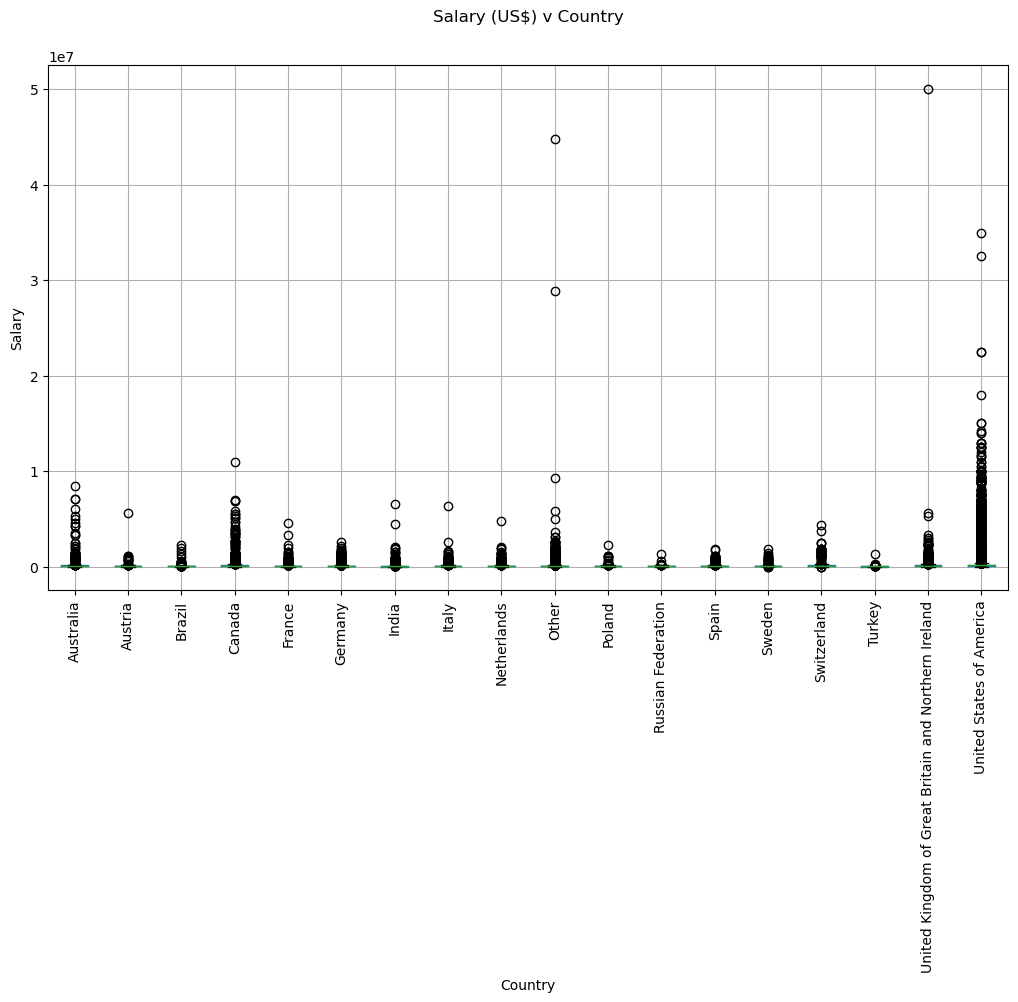

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot("Salary", "Country", ax =ax)
plt.suptitle('Salary (US$) v Country')
plt.title("")
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [12]:
df = df[df["Salary"] <= 200000]
df = df[df['Country'] != "Other"]

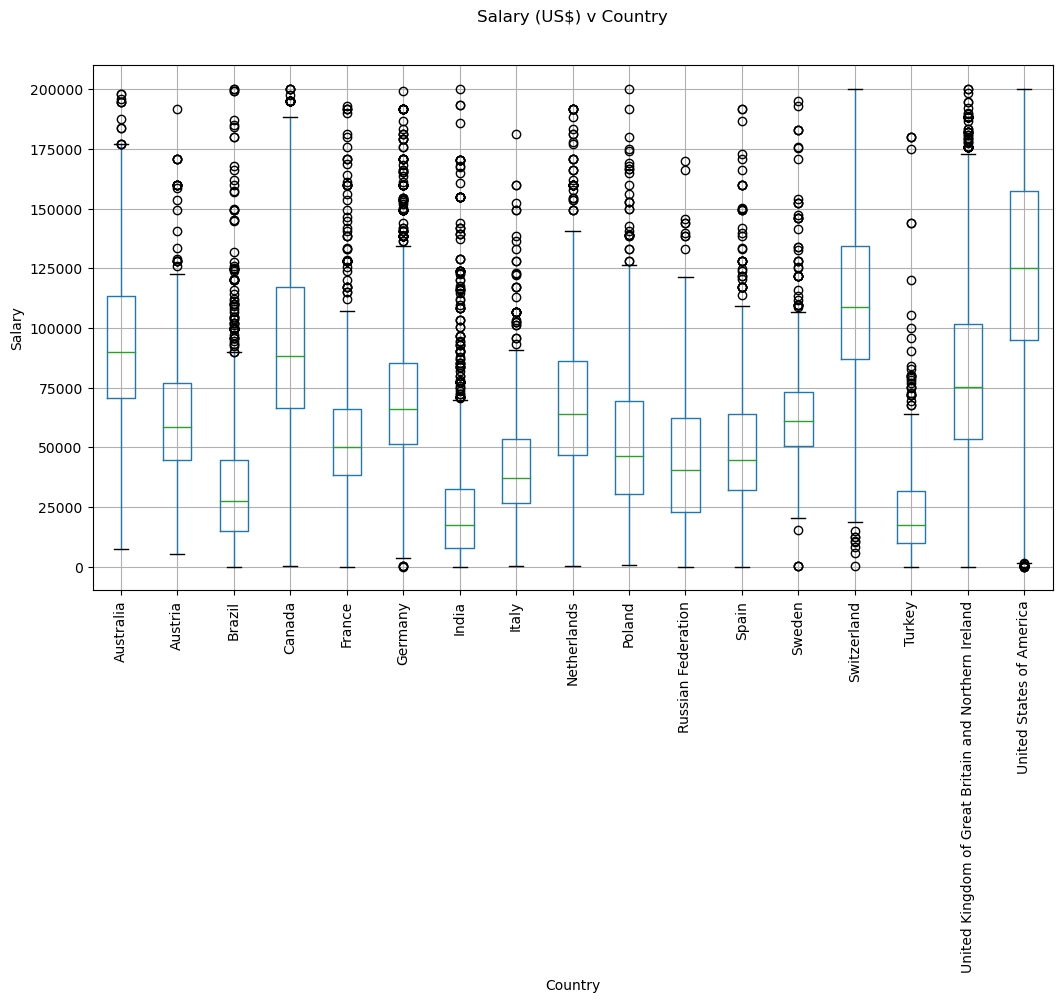

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot("Salary", "Country", ax =ax)
plt.suptitle('Salary (US$) v Country')
plt.title("")
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
df["YearsCodePro"].unique()

array(['5', '6', '2', '10', '22', '4', '20', '9', '14', '21', '15', '25',
       '3', '8', '12', '7', '19', '1', '17', '24', '11', '23',
       'Less than 1 year', '18', '40', '37', '46', '13', '32', '31', '39',
       '27', '28', '16', '30', '34', '35', '26', '42', '38', '36', '41',
       '44', '29', '33', '45', '48', '43', '50', '47',
       'More than 50 years', '49'], dtype=object)

In [52]:
df["Country"].unique()

array([15,  8, 16,  1,  7,  3,  5,  9,  4,  2, 12, 11, 14,  6, 10, 13,  0])

In [15]:
def clean_experience(x):
    if x == "Less than 1 year":
        return 0.5
    if x == "More than 50 years":
        return 50
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

In [16]:
df["YearsCodePro"].unique()

array([ 5. ,  6. ,  2. , 10. , 22. ,  4. , 20. ,  9. , 14. , 21. , 15. ,
       25. ,  3. ,  8. , 12. ,  7. , 19. ,  1. , 17. , 24. , 11. , 23. ,
        0.5, 18. , 40. , 37. , 46. , 13. , 32. , 31. , 39. , 27. , 28. ,
       16. , 30. , 34. , 35. , 26. , 42. , 38. , 36. , 41. , 44. , 29. ,
       33. , 45. , 48. , 43. , 50. , 47. , 49. ])

In [17]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [18]:
def clean_education(x):
    if "Bachelor" in x:
        return "Bachelor's degree"
    if "Master" in x:
        return "Master's degree"
    if "Professional" in x or "doctoral" in x:
        return "Advanced degree"
    
    return "Less than a Bachelor"
    
df["EdLevel"] = df["EdLevel"].apply(clean_education)
    

In [19]:
df['EdLevel'].unique()

array(["Master's degree", "Bachelor's degree", 'Less than a Bachelor',
       'Advanced degree'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
df["EdLevel"].unique()


array([3, 1, 2, 0])

In [21]:
le_country = LabelEncoder()
df["Country"]= le_country.fit_transform(df["Country"])
df['Country'].unique()

array([15,  8, 16,  1,  7,  3,  5,  9,  4,  2, 12, 11, 14,  6, 10, 13,  0])

In [22]:
x = df.drop('Salary', axis = 1)
y = df["Salary"]

In [24]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

LinearRegression()

In [25]:
y_pred = linear_reg.predict(x)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [27]:
error

41335.0139130714

In [28]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(x, y.values)

DecisionTreeRegressor(random_state=0)

In [29]:
y_pred = dec_tree_reg.predict(x)

In [30]:
error = np.sqrt(mean_squared_error(y, y_pred))
error

30111.58807494311

In [31]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state = 0)
random_forest_reg.fit(x, y.values)

RandomForestRegressor(random_state=0)

In [32]:
y_pred = random_forest_reg.predict(x)

In [33]:
error = np.sqrt(mean_squared_error(y, y_pred))
error

30189.1295688697

In [34]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 10, 25, 50, 100]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state = 0)
gs = GridSearchCV(regressor, parameters, scoring="neg_mean_squared_error")
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 10, 25, 50, 100]},
             scoring='neg_mean_squared_error')

In [35]:
regressor = gs.best_estimator_

regressor.fit(x, y.values)
y_predict = regressor.predict(x)
error = np.sqrt(mean_squared_error(y, y_pred))
error

30189.1295688697

In [36]:
x

,Country,EdLevel,YearsCodePro
2,15,3,5.0
8,8,3,6.0
10,15,1,2.0
11,16,1,10.0
12,16,1,5.0
...,...,...,...
73114,5,2,2.0
73116,16,1,16.0
73119,16,1,1.0
73120,11,1,2.0


In [42]:
x_new = np.array([["Australia", "Advanced degree", 35]])
x_new

array([['Australia', 'Advanced degree', '35']], dtype='<U15')

In [43]:
x_new[:, 0] = le_country.transform(x_new[:, 0])
x_new[:, 1] = le_education.transform(x_new[:, 1])
x_new = x_new.astype(float)
x_new


array([[ 0.,  0., 35.]])

In [45]:
y_pred = regressor.predict(x_new)
y_pred

c:\Users\mjanuadi\.conda\envs\ml_salary\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([95753.])

In [46]:
import pickle

In [51]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open("model/saved_model_latest.pkl", "wb") as file:
    pickle.dump(data, file)

In [48]:
with open("model/saved_model.pkl", "rb") as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country_loaded = data["le_country"]
le_education_loaded = data["le_education"]


In [49]:
x_test = np.array([["Canada", "Master's degree", 2]])
x_test[:, 0] = le_country.transform(x_test[:, 0])
x_test[:, 1] = le_education.transform(x_test[:, 1])
x_test = x_test.astype(float)
x_test

array([[3., 3., 2.]])

In [50]:
y_pred = regressor.predict(x_test)
y_pred

c:\Users\mjanuadi\.conda\envs\ml_salary\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([78525.6])